In [444]:
# In this notebook you will find data from my own Netflix account which is shared with my family. 
# This notebook will include several questions, plots and analysis. 

In [445]:
# First we need to import pandas as this is the python library I will use to analyse the data. 
# We also need to import the data file. 
import pandas as pd
data = pd.read_csv("/Users/Nelia/Desktop/annd/netflix-report/CONTENT_INTERACTION/ViewingActivity.csv")


In [446]:
# Let´s have a look at the data we have before any analysis.  

data

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2022-11-23 23:51:10,00:10:13,NaN,Madagaskar,NaN,Apple TV 3 (revised),00:10:13,00:10:13,DE (Germany)
1,Kids,2021-08-04 11:05:32,01:31:24,NaN,Olsenbanden jr. går under vann,NaN,Apple TV 3 (revised),01:31:24,01:31:24,NO (Norway)
2,Kids,2021-04-11 13:44:43,01:20:12,NaN,Kjæledyrenes hemmelige liv 2,NaN,Apple TV 3 (revised),01:20:12,01:20:12,NO (Norway)
3,Kids,2020-09-03 06:52:11,00:04:19,NaN,Bamse – Verdens sterkeste bjørn: Bamse: Det st...,NaN,Safari MAC (Cadmium),00:04:21,00:04:21,NO (Norway)
4,Kids,2020-05-14 14:24:48,00:00:33,NaN,Slipp Willy fri,NaN,Apple TV 3 (revised),00:00:32,00:00:32,NO (Norway)
...,...,...,...,...,...,...,...,...,...,...
16006,Venke,2016-02-02 16:54:12,01:00:49,NaN,Lilo & Stitch,NaN,Chrome PC (Cadmium),01:00:49,01:00:49,US (United States)
16007,Venke,2016-01-23 15:40:11,00:00:05,NaN,Peaceful Warrior,NaN,Chrome PC (Cadmium),00:00:05,00:00:05,BR (Brazil)
16008,Venke,2016-01-23 12:50:58,02:04:25,NaN,Knocked Up,NaN,Chrome PC (Cadmium),02:04:25,02:04:25,NO (Norway)
16009,Venke,2014-09-23 13:56:51,00:00:01,NaN,Fornuft og følelser,NaN,PC,00:00:00,00:00:00,NO (Norway)


In [447]:
# First question: How much data do we have? 

# To answer this question we can code for "data size", and the total amount will appear, giving us information about 
# what we have going for us. 

data.size

160110

In [448]:
# Second question: What are the different categories (columns) available from this data set? 

# To answer this question we can code for "data columns" to get information about each column and category in the data,
# we can also code for "data types" to get information that each of the category is its own object. 

In [449]:
data.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [450]:
data.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [451]:
# Let´s have a look at the different profiles. 
# Third question: How many profiles are active for this Netflix account? 

# To answer this question we use the category "Profile Name" and add the "unique" function, which gives us all the 
# different "sub groups" within that category. 

data["Profile Name"].unique()

array(['Kids', 'Kornelia', 'Sarah', 'Venke '], dtype=object)

In [452]:
# Fourth question: Which profile has the most viewing activity/interactions? 

# To answer this question we need to add the function for "value counts" to the data within each profile. This 
# will give us the values for each profile. 

data["Profile Name"].value_counts()

Kornelia    10473
Sarah        4815
Venke         697
Kids           26
Name: Profile Name, dtype: int64

In [453]:
# Let´s look at the fourth question in a plot. 

In [454]:
# We need to import the data vizualisation library called matplotlib to get nice plots etc. 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

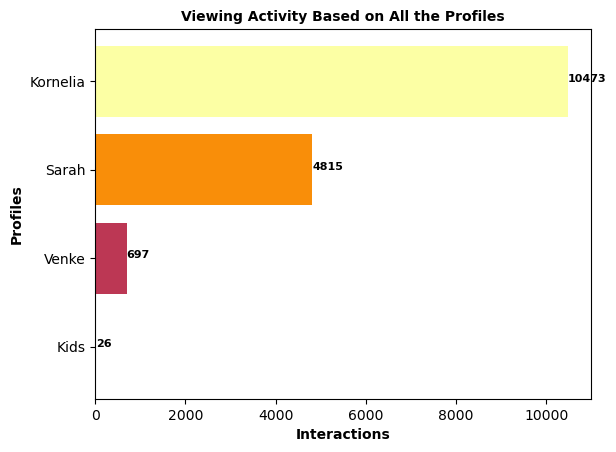

In [455]:
# In this plot I wanted to create a horizontal bar plot, from highest till lowest values, of the profile´s interactions. 
# This plot contains colors suitable for color blindness, I also added the values to each bar to help separate the 
# profiles. 
# Lastly, I added titles and labels. 

Profile_data = {"Kornelia":10473, "Sarah":4815, "Venke":697, "Kids":26}
Profile_Name = list(Profile_data.keys())
Profile_Values = list(Profile_data.values())
c = ("#fcffa4", "#f98e09", "#bc3754", "#57106e")
plt.barh (Profile_Name, Profile_Values, 0.8, color = c)
for index, value in enumerate (Profile_Values):
    plt.text(value, index, str (value), weight = "bold", size = 8)
plt.gca().invert_yaxis()
plt.title ("Viewing Activity Based on All the Profiles", weight = "bold", size = 10)
plt.ylabel ("Profiles", weight = "bold")
plt.xlabel ("Interactions", weight = "bold")
plt.show()

In [456]:
# Fifth question: What is the total time used on Netflix (based on all four profiles)?

# To answer this question we can use code that converts the "Start Time" column to datetime format and 
# the "Duration" column to timedelta format, and then print the data types of all columns in the DataFrame

data["Start Time"] = pd.to_datetime(data["Start Time"], utc = True)
data["Duration"] = pd.to_timedelta(data["Duration"])
data.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [457]:
# Then we can get the sum for the total use of the Netflix account, based on all profiles. 

data["Duration"].sum()

Timedelta('278 days 09:39:44')

In [458]:
# Sixth question: How much time have each profile used on Netflix, and which one has used it the most? 

# To answer this question we have to use the Pandas loc method to select all rows in the "Duration" column of a 
# DataFrame where the 'Profile Name' column is equal to each profile name, and then it calculates the sum of those values.
# The .loc method allows us to select data based on specific conditions like specific profiles.
# The "sum" method is used to calculate the sum of all values in the selected column, so we have to do this for all 
# profiles individually. 

In [459]:
data.loc[data["Profile Name"]=="Kornelia","Duration"].sum()

Timedelta('185 days 19:02:49')

In [460]:
data.loc[data["Profile Name"]=="Sarah","Duration"].sum()

Timedelta('78 days 08:41:59')

In [461]:
# I am not sure why this profile gives "0", when we previously saw that this profile has the third most interactions and 
# also we can see thorugh the data that "Venke´s" profile has been used to watch Netflix. 
# I could not find anything wrong with the code as it was the exact same as I used for the other profiles.
# In addition, when looking at the total sum of all the profiles, I noticed about 15 days are missing when subtracting
# Kornelia´s and Sarah´s profile from the total, indicating that these 15 days probably would belong to Venke´s profile.

data.loc[data["Profile Name"]=="Venke","Duration"].sum()

Timedelta('0 days 00:00:00')

In [462]:
data.loc[data["Profile Name"]=="Kids","Duration"].sum()

Timedelta('0 days 10:44:03')

In [463]:
# Seventh question: Now let´s convert these numbers into seconds and look at the two most used profiles. 

# To do this we need to add the .astype and timedelta64 (s), so it will convert the duration to seconds. 

In [464]:
data.loc[data["Profile Name"]=="Kornelia","Duration"].astype("timedelta64[s]").sum()

16052569.0

In [465]:
data.loc[data["Profile Name"]=="Sarah","Duration"].astype("timedelta64[s]").sum()

6770519.0

In [466]:
viewTime = {}
viewTime.update({"Kornelia": data.loc[data['Profile Name']=='Kornelia','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Sarah": data.loc[data['Profile Name']=='Sarah','Duration'].astype('timedelta64[s]').sum()})
viewTime

{'Kornelia': 16052569.0, 'Sarah': 6770519.0}

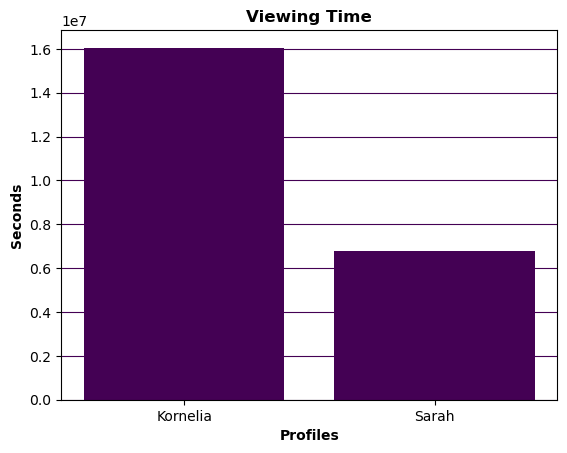

In [467]:
# Now, the seventh question will be turned into a plot to highlight the difference between the two most used 
# profiles on the account. 

plt.bar(*zip(*viewTime.items()), color = "#440154", )
plt.title ("Viewing Time", weight = "bold")
plt.ylabel ("Seconds", weight = "bold")
plt.xlabel ("Profiles", weight = "bold")
ax = plt.gca()
ax.tick_params(axis ="x", colors ="black")
ax.tick_params(axis ="y", colors ="black")
ax.grid (axis = "y", linestyle="-", color = "#440154")
plt.show()


In [468]:
# Eighth question: Which device types has been used to watch netflix?
# Which one has been most used based on all profiles? 

# Here we have to do the same as previously with the different profiles. We use the function .unique to get which 
# device types we have in the data set. Also, we use the function for value counts to get how many times the device 
# has been used. 

In [469]:
data["Device Type"].unique()

array(['Apple TV 3 (revised)', 'Safari MAC (Cadmium)',
       'Apple iPhone 7 (GSM)', 'Apple Apple TV 4K 3rd Gen Apple TV',
       'iPhone 12 Pro', 'Netflix Chrome MAC (Cadmium) HTML 5',
       'Telenor TNR-3770CF MVPD STB', 'Apple iPhone 8 Plus (GSM)',
       'iPad Pro 9.7-Inch (WiFi/LTE)', 'Chrome PC (Cadmium)',
       'Apple iPhone 7 Plus (GSM)',
       'Google Chromecast V3 Streaming Stick', 'iPhone 5S CDMA', 'Mobile',
       'Internet Explorer (Cadmium)', 'PC', 'Mac',
       'Windows 8 x64 devices', 'Apple iPhone 5 with CDMA',
       'Apple iPhone 11 Pro', 'Apple iPad 6th Gen 9.7 (Wi-Fi) iPad',
       'Apple iPhone XS', 'Apple iPhone 8 (GSM)', 'Edge (Cadmium)',
       'Apple iPhone 6s',
       'Android DefaultWidevineL3Tablet Android Tablet',
       'Apple iPhone 4S'], dtype=object)

In [470]:
data["Device Type"].value_counts()

Safari MAC (Cadmium)                              5399
Apple TV 3 (revised)                              2592
Chrome PC (Cadmium)                               1709
Netflix Chrome MAC (Cadmium) HTML 5               1190
Internet Explorer (Cadmium)                       1078
Mac                                                626
Edge (Cadmium)                                     554
iPad Pro 9.7-Inch (WiFi/LTE)                       464
Apple iPad 6th Gen 9.7 (Wi-Fi) iPad                319
iPhone 12 Pro                                      234
iPhone 5S CDMA                                     210
Apple iPhone 6s                                    197
Telenor TNR-3770CF MVPD STB                        196
Apple iPhone 11 Pro                                187
PC                                                 186
Apple iPhone 8 Plus (GSM)                          185
Windows 8 x64 devices                              146
Apple iPhone 4S                                    111
Mobile    

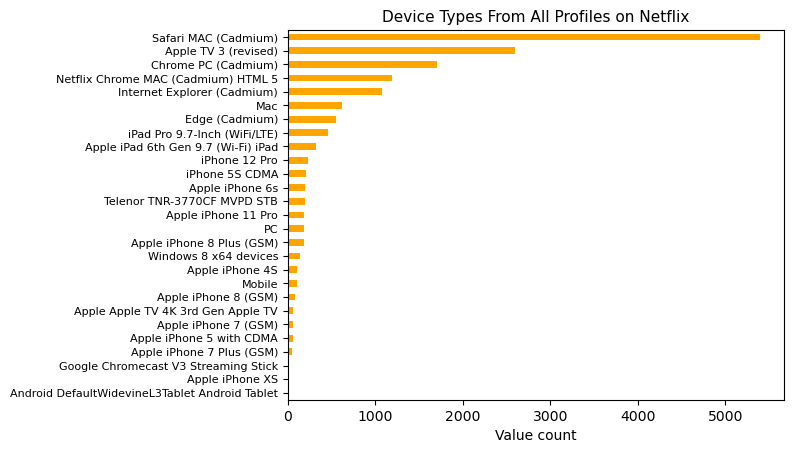

In [471]:
# Let´s turn this into a simple horizontal bar plot to vizualize these device types based on value counts, with the 
# most used device at the top. 

data["Device Type"].value_counts().plot(kind ="barh", color = "Orange")
plt.title ("Device Types From All Profiles on Netflix", size = 11)
plt.yticks (size = 8)
plt.xticks (size = 10)
plt.xlabel ("Value count")
plt.gca().invert_yaxis()
plt.show() 

In [472]:
# Ninth question: Which devices was most used by Kornelia´s profile? 

# To find out which device types the profile for "Kornelia" used the most, we will create a new dataframe for this 
# profile. So, data2 will be a new dataframe containing only the rows where the "Profile Name" column equals 
#"Kornelia". This can be useful for further analysis or visualization of a subset of the original data. 
# When we have created the new dataframe, we can use this to do the same as previously: check for value counts 
# per device type. 

In [473]:
data2 = data[data["Profile Name"] == "Kornelia"]

In [474]:
data2["Device Type"].value_counts()

Safari MAC (Cadmium)                    5116
Apple TV 3 (revised)                    2102
Netflix Chrome MAC (Cadmium) HTML 5     1170
Chrome PC (Cadmium)                      747
Mac                                      568
iPhone 12 Pro                            234
Apple iPhone 8 Plus (GSM)                185
iPhone 5S CDMA                            81
Apple Apple TV 4K 3rd Gen Apple TV        58
Apple iPhone 5 with CDMA                  56
Apple iPhone 7 (GSM)                      47
Apple iPhone 7 Plus (GSM)                 44
Mobile                                    33
Telenor TNR-3770CF MVPD STB               10
Internet Explorer (Cadmium)                9
Windows 8 x64 devices                      4
Google Chromecast V3 Streaming Stick       3
iPad Pro 9.7-Inch (WiFi/LTE)               3
PC                                         3
Name: Device Type, dtype: int64

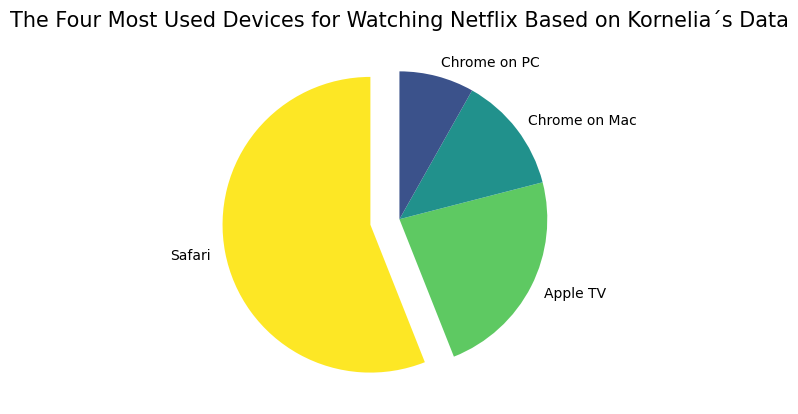

In [475]:
# I wanted to vizualise this spread of device types in a pie chart, however, I wanted to only look at top 4. 
# When doing this, I needed to import numpy to be able to create a code using a numpy array function 
# that contained the top 4 scores. 
# I added labels for each device type, and also colors (color blind friendly). In addition I also added a function 
# called "myexplode" to highlight the biggest piece of the pie chart. I set the start angle to 90 for better 
# vizualisation. 
import matplotlib.pyplot as plt
import numpy as np 
y = np.array([5116, 2102, 1170, 747])
mylabels = ["Safari", "Apple TV", "Chrome on Mac", "Chrome on PC"]
mycolors = ["#fde725", "#5ec962", "#21918c", "#3b528b"]
myexplode = [0.2, 0, 0, 0]

plt.pie(y, labels = mylabels, colors = mycolors, explode = myexplode, startangle = 90)
plt.title ("The Four Most Used Devices for Watching Netflix Based on Kornelia´s Data", size = 15)
plt.show() 


In [476]:
# Tenth question: In which countries have Kornelia´s profile watched the most Netflix? Based on data2.
# Again, we will use the same code as previously when checking for profiles and device types. 

data2["Country"].value_counts()

NO (Norway)            9661
US (United States)      769
PT (Portugal)            21
UG (Uganda)               5
KE (Kenya)                3
LK (Sri Lanka)            2
LV (Latvia)               2
DE (Germany)              2
MV (Maldives)             1
RW (Rwanda)               1
ZZ (Unknown Region)       1
GB (United Kingdom)       1
NL (Netherlands)          1
FR (France)               1
CA (Canada)               1
SE (Sweden)               1
Name: Country, dtype: int64

In [477]:
# Now let´s look at this in a bar plot of top 5 countries. Here I made two lists, one with countries and one with the 
# values from the countries. Here I tried a somewhat different approach than previously, by using these lists to make
# the plot. I added a color, and here I also added a black edge color to outline the edges of the bars. 
# I set the font to "Times New Roman" to try something new, and I also set the rotation to 40 on the x ticks. 
# In addition, I added value count labels and it works as an better indication for the differences between the bars, 
# as the value count is so spread. However, to conclude, this plot is not the best, but it works. 

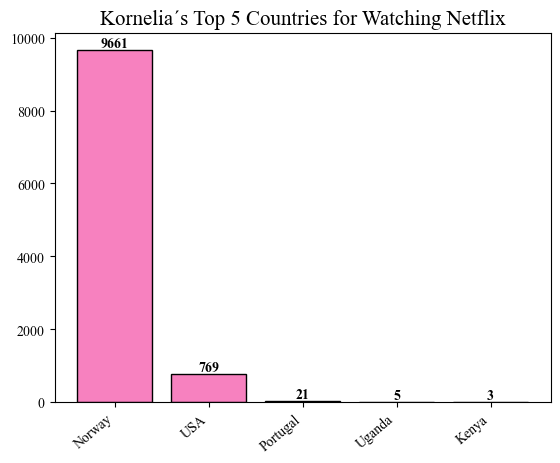

In [478]:
Country = ["Norway", "USA", "Portugal", "Uganda", "Kenya"]
values_country = [9661, 769, 21, 5, 3]

barplot = plt.bar (x = Country, height = values_country, fc = "#f781bf", ec = "black")
plt.bar_label(barplot, labels = values_country, label_type = "edge", font = "Times New Roman", weight = "bold")
plt.yticks (font = "Times New Roman")
plt.xticks (rotation = 40, ha = "right", font = "Times New Roman")
plt.title ("Kornelia´s Top 5 Countries for Watching Netflix", font = "Times New Roman", size = 15)
plt.show()

In [479]:
# Twelfth question: Where in the world has the van Ingen family watched Netflix the most?

In [480]:
df = pd.read_csv("/Users/Nelia/Desktop/annd/netflix-report/CONTENT_INTERACTION/ViewingActivity.csv")

In [481]:
#I made a dataframe to count up the number of countries in my dataset, in addition, also their values. 
total_per_country = df.groupby(by = "Country").count()
total_per_country_sorted = total_per_country.sort_values (by = "Bookmark", ascending = False) 

In [482]:
# Code to look at the data
total_per_country_sorted

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark
Country,,,,,,,,,
NO (Norway),14283,14283,14283,2269,14283,495,14283,14283,14283
US (United States),964,964,964,1,964,0,964,964,964
GB (United Kingdom),557,557,557,100,557,0,557,557,557
NL (Netherlands),94,94,94,8,94,0,94,94,94
PT (Portugal),33,33,33,1,33,0,33,33,33
DE (Germany),28,28,28,0,28,0,28,28,28
GR (Greece),16,16,16,0,16,0,16,16,16
UG (Uganda),5,5,5,0,5,0,5,5,5
MX (Mexico),4,4,4,4,4,4,4,4,4


In [483]:
# The previous plot is not optimal, as the values are so spread, and the plot is not very educational, 
# even with the value labels. Therefore, when I was going to make a plot for all the countries based on all profiles, 
# I decided to make a non-linear axe plot with log. 

In [484]:
# To make things easier I put the index (total per country) in a variable called X (after turning it into a list). And 
# I put the number of times it was mentioned into a variable called y. 
x = list(total_per_country_sorted.index)
y = list (total_per_country_sorted["Bookmark"])

In [485]:
# After doing all this, I could easily make a plot by using matplotlib. I did changed the marker of each plot to 
# dots, and I also changed the size of these dots. I chose a color, however I did not want to fill them in. 
# I rotated my x ticks, to make them more readable, as well as changing the size so they could all fit. 
# Lastly, I added titles and made them bold. 

/var/folders/33/2xq5nttd3n3b46lsn78nq7w40000gn/T/ipykernel_52815/2279366077.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (x, rotation=45, ha="right", size=9)


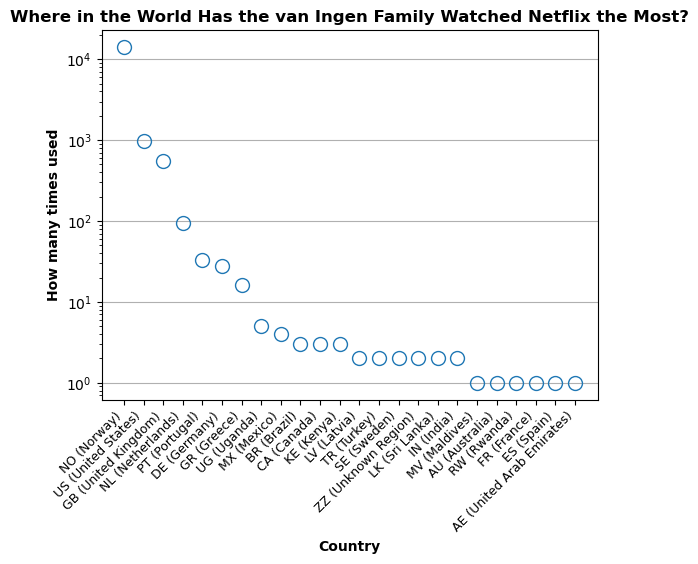

In [486]:
f, ax = plt.subplots()
ax.plot (x, y, linestyle = "none", marker = ".", markersize = 20, fillstyle = "none", color = "C0" )
ax.set_xticklabels (x, rotation=45, ha="right", size=9)
ax.set_ylabel ("How many times used", weight = "bold")
ax.set_xlabel ("Country", weight = "bold")
ax.set_title ("Where in the World Has the van Ingen Family Watched Netflix the Most?", weight = "bold")
ax.grid (axis = "y")
ax.set_yscale("log")
plt.show()

In [487]:
# Thirteenth question: Did Kornelia and Sarah both watch the movie called "Someone Great" on Netflix? 
# To answer this, last, question I will use the same dataframe as with the countries. 

In [488]:
# I wanted to make sure that "Title" still was present as a category/column before starting any analysis.  
df.keys ()

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [489]:
# Let´s see if it is true or false that the title I am interested in actually is in the dataset we have.
"Someone Great" in df["Title"].unique()

True

In [490]:
# I created a filter that would filter out every row containing "Someone Great" in the "Title". By doing this I 
# extract specific information from a large data set, about this title in connection to my family´s Netflix account, 
# for instance: profile name, date, duration, device types and country, which is categories we have gotten 
# familiar with throughout this whole data analysis. 

filter1 = filter (lambda a: "Someone Great" in a, df ["Title"])
print (smole)

      Profile Name           Start Time  Duration  \
599       Kornelia  2022-06-03 17:10:23  01:27:51   
1284      Kornelia  2021-07-04 21:40:21  01:28:00   
2951      Kornelia  2019-12-06 21:09:55  01:27:58   
3592      Kornelia  2019-05-18 17:45:44  01:27:56   
10593        Sarah  2022-05-14 22:30:41  00:00:07   
11021        Sarah  2021-06-27 21:31:01  00:00:36   
11094        Sarah  2020-11-26 18:34:20  01:28:32   

                                   Attributes          Title  \
599                                       NaN  Someone Great   
1284                                      NaN  Someone Great   
2951                                      NaN  Someone Great   
3592   Autoplayed: user action: Unspecified;   Someone Great   
10593                                     NaN  Someone Great   
11021                                     NaN  Someone Great   
11094                                     NaN  Someone Great   

      Supplemental Video Type                          Device 